In [26]:
import pandas as pd
import anndata as ad
import numpy as np
import gseapy



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.

In [2]:
deg_data_path = "/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/"

# Gene Set Enrichment Analysis

## Males 50-70 yo.

In [ ]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [102]:

mask = ((ppmi_ad.obs['Age_Group'] == '50-70') &
        (ppmi_ad.obs['Gender'] == 'Male') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])))
ppmi_ad = ppmi_ad[mask]

In [28]:
symbol_ensembl_mapping = ppmi_ad.varm['symbol_ensembl_mapping']

In [35]:
deg_males_50_70 = pd.read_csv(f"{deg_data_path}/DEGs_stratified_Male_BL_50-70.csv", index_col=0)

In [39]:
deg_males_50_70 = deg_males_50_70.merge(symbol_ensembl_mapping, left_index=True, right_index=True)

In [46]:
deg_sign = deg_males_50_70[(np.abs(deg_males_50_70['log2FoldChange']) >= 0.5) & (deg_males_50_70['padj'] <= 0.05)]

In [50]:
ranked_genes = deg_sign.set_index('gene_symbol')['stat'].sort_values(ascending=False)

In [51]:
ranked_genes = ranked_genes[~ranked_genes.isna()]

In [52]:
ranked_genes

gene_symbol
RN7SL60P           5.686495
LINC03126          4.588187
ENSG00000281741    4.451634
LINC00355          4.382978
SEC14L5           -3.940068
ENSG00000261003   -3.952822
ENSG00000275898   -3.989781
PTPRG             -4.005222
FOSB              -4.030188
COL11A2           -4.034842
FAM186B           -4.064581
RN7SL564P         -4.067679
AP3B2             -4.086733
MPL               -4.169189
SAMD14            -4.177679
HBA2              -4.199735
GP1BA             -4.203020
HSALR1            -4.247269
RN7SL126P         -4.258760
H2AC5P            -4.268572
RN7SL210P         -4.314149
LOC124908527      -4.339488
VWCE              -4.468228
ENSG00000262495   -4.564740
EGR1              -4.631282
RN7SL664P         -4.708417
RNVU1-32          -4.848939
ENSG00000278917   -5.027044
NRGN              -5.108393
RNU1-2            -5.286429
RN7SL692P         -5.573591
RN7SKP90          -5.686595
KRT79             -6.372922
XIST              -7.444316
Name: stat, dtype: float64

https://www.gsea-msigdb.org/gsea/msigdb/human/collections.jsp#H

In [59]:
gmt_file_path = "/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/gsea/gmt"
c2_all = "c2.all.v2024.1.Hs.symbols.gmt"
c3_all = "c3.all.v2024.1.Hs.symbols.gmt"
c5_all = "c5.all.v2024.1.Hs.symbols.gmt"
c7_all = "c7.all.v2024.1.Hs.symbols.gmt"
hallmark_all = "h.all.v2024.1.Hs.symbols.gmt"


In [67]:
ranked_genes = ranked_genes.dropna()
ranked_genes = ranked_genes.sort_values(ascending=False, key=abs)

In [83]:
ranked_genes

gene_symbol
XIST              -7.444316
KRT79             -6.372922
RN7SKP90          -5.686595
RN7SL60P           5.686495
RN7SL692P         -5.573591
RNU1-2            -5.286429
NRGN              -5.108393
ENSG00000278917   -5.027044
RNVU1-32          -4.848939
RN7SL664P         -4.708417
EGR1              -4.631282
LINC03126          4.588187
ENSG00000262495   -4.564740
VWCE              -4.468228
ENSG00000281741    4.451634
LINC00355          4.382978
LOC124908527      -4.339488
RN7SL210P         -4.314149
H2AC5P            -4.268572
RN7SL126P         -4.258760
HSALR1            -4.247269
GP1BA             -4.203020
HBA2              -4.199735
SAMD14            -4.177679
MPL               -4.169189
AP3B2             -4.086733
RN7SL564P         -4.067679
FAM186B           -4.064581
COL11A2           -4.034842
FOSB              -4.030188
PTPRG             -4.005222
ENSG00000275898   -3.989781
ENSG00000261003   -3.952822
SEC14L5           -3.940068
Name: stat, dtype: float64

In [84]:
import gseapy as gp
enr = gp.enrichr(gene_list=ranked_genes.index.tolist(),
                 gene_sets=['MSigDB_Hallmark_2020',
                            'KEGG_2021_Human',
                            'WikiPathways_2024_Human',
                            'Human_Phenotype_Ontology',
                            'GO_Biological_Process_2023',
                            'GO_Molecular_Function_2023',
                            'GO_Cellular_Component_2023',
                            'SynGO_2024',
                            'OMIM_Disease'],
                 organism='human')

In [88]:
enr_results_sorted = enr.results.sort_values(by='Adjusted P-value', ascending=True)

In [89]:
enr_results_sorted

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
59,Human_Phenotype_Ontology,Spontaneous abortion (HP:0005268),2/11,0.000153,0.015017,0,0,138.590278,1217.704538,MPL;XIST
60,Human_Phenotype_Ontology,Bruising susceptibility (HP:0000978),3/79,0.000325,0.015017,0,0,25.326825,203.420634,MPL;GP1BA;HBA2
61,Human_Phenotype_Ontology,Abnormality of the heme biosynthetic pathway (...,2/17,0.000375,0.015017,0,0,83.129167,655.675615,MPL;HBA2
62,Human_Phenotype_Ontology,Gingival bleeding (HP:0000225),2/20,0.000523,0.015685,0,0,69.263889,523.375753,MPL;GP1BA
63,Human_Phenotype_Ontology,Abnormal delivery (HP:0001787),2/28,0.001031,0.024752,0,0,47.932692,329.628496,MPL;XIST
...,...,...,...,...,...,...,...,...,...,...
276,GO_Biological_Process_2023,Regulation Of Gene Expression (GO:0010468),1/1127,0.861053,0.878626,0,0,0.507024,0.075850,EGR1
277,GO_Biological_Process_2023,Regulation Of Transcription By RNA Polymerase ...,2/2028,0.872631,0.881445,0,0,0.553430,0.075401,EGR1;FOSB
278,GO_Biological_Process_2023,Positive Regulation Of DNA-templated Transcrip...,1/1243,0.887350,0.887350,0,0,0.456839,0.054600,EGR1
314,GO_Cellular_Component_2023,Intracellular Membrane-Bounded Organelle (GO:0...,3/5175,0.996936,0.998089,0,0,0.276813,0.000850,EGR1;FOSB;AP3B2


In [90]:
symbol_ensembl_mapping[symbol_ensembl_mapping['gene_symbol'] == 'XIST'].index

Index(['ENSG00000229807.11'], dtype='object', name='ensembl_id')

Text(0.5, 1.0, 'XIST Expression in Male PD vs Controls')

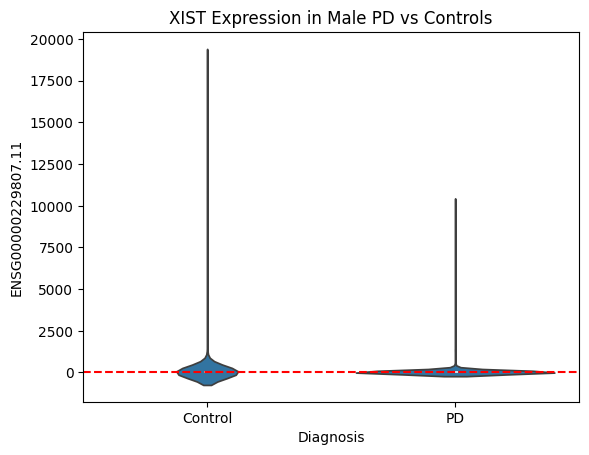

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
expression_data = ppmi_ad.to_df()
expression_data['Diagnosis'] = ppmi_ad.obs['Diagnosis']
sns.violinplot(x='Diagnosis', y='ENSG00000229807.11', data=expression_data)
plt.axhline(y=0, color='r', linestyle='--')  # Expected male baseline
plt.title("XIST Expression in Male PD vs Controls")

In [104]:
print("XIST expression summary:")
print(expression_data.groupby('Diagnosis')['ENSG00000229807.11'].describe())


XIST expression summary:
           count        mean          std  min  25%  50%    75%      max
Diagnosis                                                               
Control    360.0  143.905556  1211.502280  0.0  1.0  3.0  15.25  18665.0
PD         727.0   50.977992   415.879151  0.0  1.0  4.0  21.00  10223.0


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_52958/2655181177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(expression_data.groupby('Diagnosis')['ENSG00000229807.11'].describe())
